In [ ]:
#Getting the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import skew

Loading the datset

In [ ]:
#Downloading the data from UCI website (https://archive.ics.uci.edu/ml/datasets/heart+disease)
heart_dataset = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
heart_dataset.head()
#here our target is Death_Event
#Only DEATH_EVENT is dependent variable all others are independent variables

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#checking for null values 
heart_dataset.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

The target(outcome) of the dataset

In [ ]:
heart_dataset.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
# Normalizing the DEATH_EVENT for exploratory data analysis
heart_dataset.DEATH_EVENT.value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

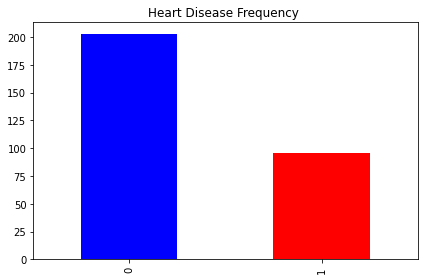

In [ ]:
#Making a barplot.
heart_dataset.DEATH_EVENT.value_counts().plot(kind = 'bar', color = ["blue", 'red'])
plt.title("Heart Disease Frequency ")
plt.tight_layout()
plt.show()

Analysing the sex with the target values(Death event)

In [ ]:
#Grouping by with respect to sex, this 
result = heart_dataset.groupby(['DEATH_EVENT', 'sex']).size().unstack()

print(result)

sex           0    1
DEATH_EVENT         
0            71  132
1            34   62


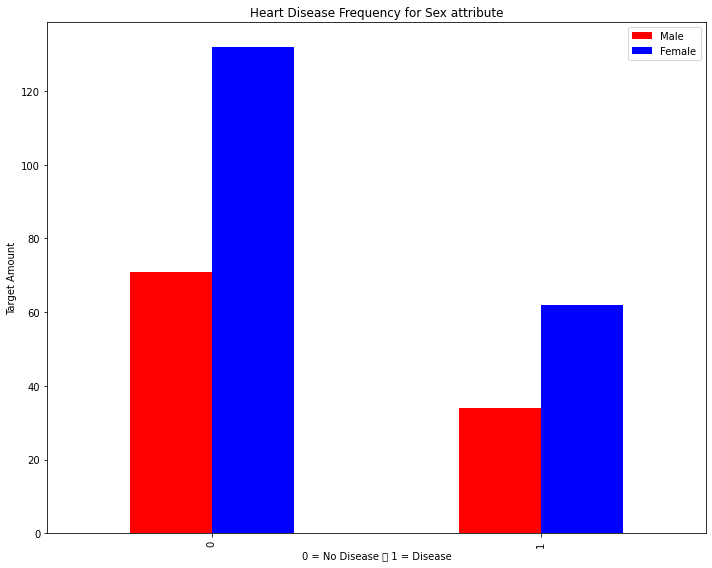

In [ ]:
result.plot(kind ='bar',figsize = (10, 8),color = ["red","blue"])
plt.title("Heart Disease Frequency for Sex attribute")
plt.xlabel("0 = No Disease \t 1 = Disease")
plt.ylabel("Target Amount")
plt.legend(["Male", "Female"])
plt.tight_layout()
plt.show()

After doing some of the EDA we would go ahead analysing the correlation between the values

In [ ]:
#Finding the factors affecting the death event
heart_dataset.corr().T

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


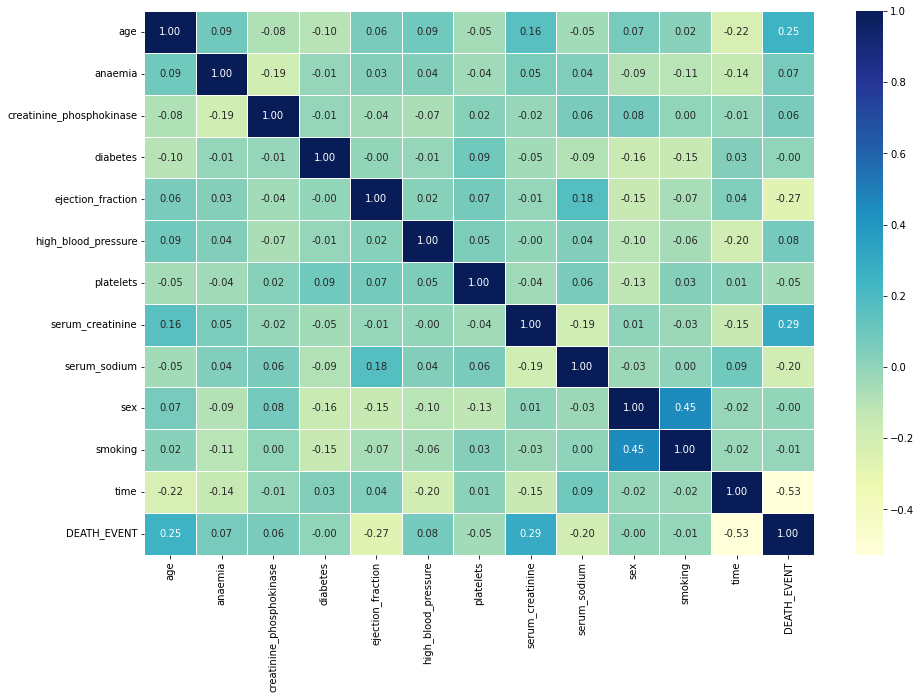

In [ ]:
#preparing the heatmap
corr_matrix = heart_dataset.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

The serum_creatinine values and age are some what closely correlated to the death event

In [ ]:
#Some skewness analysis 
#More the positively skewd more it is better 
for column in heart_dataset.columns:
    skewness = skew(heart_dataset[column])
    print(f"Skewness of column '{column}': {skewness}")

Skewness of column 'age': 0.4209365580238486
Skewness of column 'anaemia': 0.27686275801578286
Skewness of column 'creatinine_phosphokinase': 4.440688625555512
Skewness of column 'diabetes': 0.33225111677419733
Skewness of column 'ejection_fraction': 0.5525926588215331
Skewness of column 'high_blood_pressure': 0.6235833232384503
Skewness of column 'platelets': 1.4549745335147466
Skewness of column 'serum_creatinine': 4.433610162782361
Skewness of column 'serum_sodium': -1.04287046392733
Skewness of column 'sex': -0.6235833232384503
Skewness of column 'smoking': 0.7664787911444256
Skewness of column 'time': 0.12716059964019436
Skewness of column 'DEATH_EVENT': 0.7664787911444257


In [ ]:
#Independent variables 
X = heart_dataset.drop('DEATH_EVENT', axis = 1)
#Dependent variables 
y = heart_dataset.DEATH_EVENT.values

In [ ]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
#Smote method stands for Synthetic Minority Oversampling Technique.
#SMOTE is an oversampling technique for generating the synthetic samples for the minority class.
#It is helpful in overcoming the overfitting due to random oversampling.
x_data,y_data=s.fit_resample(X,y)

In [ ]:
#Oversampling and undersampling 
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = heart_dataset[(heart_dataset['DEATH_EVENT']==0)] 
df_minority = heart_dataset[(heart_dataset['DEATH_EVENT']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 203, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
# To avoid data imbalance, we are upsampling (taking the highest value) the 
df_upsampled.DEATH_EVENT.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

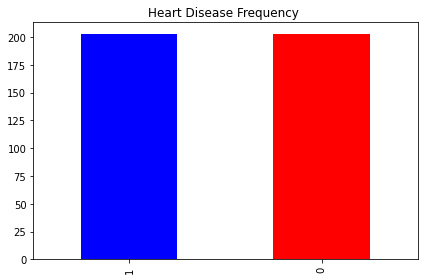

In [ ]:
df_upsampled.DEATH_EVENT.value_counts().plot(kind = 'bar', color = ["blue", 'red'])
plt.title("Heart Disease Frequency ")
plt.tight_layout()
plt.show()

In [ ]:
#Feature scaling 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaler=ss.fit_transform(x_data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y_data,test_size=0.2,random_state=11)

In [ ]:
#Logiistic Regression 
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=l1.predict(x_test)
y_pred1

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_test,y_pred1)*100
print(ac1)

81.70731707317073


In [ ]:
#Precision
from sklearn import metrics
precision_positive_logR = metrics.precision_score(y_test, y_pred1, pos_label=1)
precision_negative_logR = metrics.precision_score(y_test, y_pred1, pos_label=0)
precision_positive_logR, precision_negative_logR 

(0.7906976744186046, 0.8461538461538461)

In [ ]:
#Recall 
recall_sensitivity_logR = metrics.recall_score(y_test, y_pred1, pos_label=1)
recall_specificity_logR = metrics.recall_score(y_test, y_pred1, pos_label=0)
recall_sensitivity_logR, recall_specificity_logR 

(0.85, 0.7857142857142857)

In [ ]:
#SVM
from sklearn.svm import SVC
sv=SVC(kernel="rbf",random_state=3)
sv.fit(x_train,y_train)

SVC(random_state=3)

In [ ]:
y_pred2=sv.predict(x_test)
y_pred2

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
ac2=accuracy_score(y_test,y_pred2)*100
print(ac2)

81.70731707317073


In [ ]:
#Precision
from sklearn import metrics
precision_positive_svm = metrics.precision_score(y_test, y_pred2, pos_label=1)
precision_negative_svm = metrics.precision_score(y_test, y_pred2, pos_label=0)
precision_positive_svm, precision_negative_svm 

(0.7906976744186046, 0.8461538461538461)

In [ ]:
#Recall 
recall_sensitivity_svm = metrics.recall_score(y_test, y_pred2, pos_label=1)
recall_specificity_svm = metrics.recall_score(y_test, y_pred2, pos_label=0)
recall_sensitivity_svm, recall_specificity_svm 

(0.85, 0.7857142857142857)

In [ ]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred3=nb.predict(x_test)
y_pred3

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
ac3=accuracy_score(y_test,y_pred3)*100
print(ac3)

78.04878048780488


In [ ]:
#Precision
from sklearn import metrics
precision_positive_nb = metrics.precision_score(y_test, y_pred3, pos_label=1)
precision_negative_nb = metrics.precision_score(y_test, y_pred3, pos_label=0)
precision_positive_nb, precision_negative_nb 

(0.84375, 0.74)

In [ ]:
#Recall 
recall_sensitivity_nb = metrics.recall_score(y_test, y_pred3, pos_label=1)
recall_specificity_nb = metrics.recall_score(y_test, y_pred3, pos_label=0)
recall_sensitivity_nb, recall_specificity_nb 

(0.675, 0.8809523809523809)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred4=knn.predict(x_test)
y_pred4

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
ac4=accuracy_score(y_test,y_pred4)*100
print(ac3)

78.04878048780488


In [ ]:
#Precision
from sklearn import metrics
precision_positive_knn = metrics.precision_score(y_test, y_pred4, pos_label=1)
precision_negative_knn = metrics.precision_score(y_test, y_pred4, pos_label=0)
precision_positive_knn, precision_negative_knn 

(0.7333333333333333, 0.8108108108108109)

In [ ]:
#Recall 
recall_sensitivity_knn = metrics.recall_score(y_test, y_pred4, pos_label=1)
recall_specificity_knn = metrics.recall_score(y_test, y_pred4, pos_label=0)
recall_sensitivity_knn, recall_specificity_knn

(0.825, 0.7142857142857143)

In [ ]:
#Ensemble learning
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[("LogisticRegression",l1),("support vector machine",sv),("Naive_bayes",nb),("KNN",knn) ])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('support vector machine', SVC(random_state=3)),
                             ('Naive_bayes', GaussianNB()),
                             ('KNN', KNeighborsClassifier())])

In [ ]:
y_pred5=vc.predict(x_test)
y_pred5

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
ac4=accuracy_score(y_test,y_pred5)*100
print(ac4)

81.70731707317073


In [ ]:
#Precision
from sklearn import metrics
precision_positive_en = metrics.precision_score(y_test, y_pred4, pos_label=1)
precision_negative_en = metrics.precision_score(y_test, y_pred4, pos_label=0)
precision_positive_en, precision_negative_en

(0.8378378378378378, 0.8)

In [ ]:
#Recall 
recall_sensitivity_en = metrics.recall_score(y_test, y_pred5, pos_label=1)
recall_specificity_en = metrics.recall_score(y_test, y_pred5, pos_label=0)
recall_sensitivity_en, recall_specificity_knn

In [ ]:
#Applying GridSearchCv and RandomSearchCV to find the best params and also to check the performance 
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    }, 
    'SVM' : {
        'model' : SVC(gamma='auto'), 
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    }
}


In [ ]:
from sklearn.model_selection import GridSearchCV
scores_gscv = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores_gscv.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores_gscv,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.824135,{'C': 1}
1,naive_bayes_gaussian,0.759327,{}
2,SVM,0.845769,"{'C': 10, 'kernel': 'rbf'}"


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
scores_rscv = []
for model_random, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores_rscv.append({
        'model': model_random,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_rand = pd.DataFrame(scores_rscv,columns=['model','best_score','best_params'])
df_rand

,model,best_score,best_params
0,logistic_regression,0.824135,{'C': 1}
1,naive_bayes_gaussian,0.759327,{}
2,SVM,0.845769,"{'kernel': 'rbf', 'C': 10}"
